# PROBLEM STATEMENT
"Apex Bank seeks to optimize services and retain customers by analyzing demographic and financial chacacteristics of its customers to inform effective decision making"

# OBJECTIVES
##### To explore and analyze the bank's customer and account dataset to uncover valuable insights on customer behaviour that inform the bank's decision making process.
##### To identify trends and patterns in customer engagement .
##### To understand financial standing of customers
##### To  highlight potential areas for business improvement

# APPROACH
#### Read in,understand and clean the customer and account dataset
#### Explore and analyze the financial and demographic variables
#### Visualize data to identify trends and patterns
#### Develop insights and recommendations for business improvement

In [4]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb  

%matplotlib inline

In [5]:
#Read in the datasets
customer_df = pd.read_excel('Bank_Churn_Messy.xlsx')
account_df =pd.read_excel('Bank_Churn_Messy.xlsx', sheet_name = 'Account_Info')

In [6]:
customer_df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary
0,15634602,Hargrave,619,FRA,Female,42.0,2,€101348.88
1,15647311,Hill,608,Spain,Female,41.0,1,€112542.58
2,15619304,Onio,502,French,Female,42.0,8,€113931.57
3,15701354,Boni,699,FRA,Female,39.0,1,€93826.63
4,15737888,Mitchell,850,Spain,Female,43.0,2,€79084.1


In [7]:
account_df.tail()

,CustomerId,Balance,NumOfProducts,HasCrCard,Tenure,IsActiveMember,Exited
9997,15569892,€57369.61,1,Yes,10,Yes,0
9998,15584532,€0.0,1,Yes,7,Yes,1
9999,15682355,€75075.31,2,No,3,No,1
10000,15628319,€130142.79,1,No,4,No,0
10001,15628319,€130142.79,1,No,4,No,0


##### Merging both datasets using the common colum "CustomerId" because we want to work on the datasets as a whole

In [9]:
comb_df = pd.merge(customer_df,account_df, on ='CustomerId', how='left')

In [10]:
comb_df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure_x,EstimatedSalary,Balance,NumOfProducts,HasCrCard,Tenure_y,IsActiveMember,Exited
0,15634602,Hargrave,619,FRA,Female,42.0,2,€101348.88,€0.0,1,Yes,2,Yes,1
1,15634602,Hargrave,619,FRA,Female,42.0,2,€101348.88,€0.0,1,Yes,2,Yes,1
2,15647311,Hill,608,Spain,Female,41.0,1,€112542.58,€83807.86,1,Yes,1,Yes,0
3,15619304,Onio,502,French,Female,42.0,8,€113931.57,€159660.8,3,No,8,No,1
4,15701354,Boni,699,FRA,Female,39.0,1,€93826.63,€0.0,2,No,1,No,0


In [11]:
comb_df.tail()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure_x,EstimatedSalary,Balance,NumOfProducts,HasCrCard,Tenure_y,IsActiveMember,Exited
9999,15682355,Sabbatini,772,Germany,Male,42.0,3,€92888.52,€75075.31,2,No,3,No,1
10000,15628319,Walker,792,French,Female,28.0,4,€38190.78,€130142.79,1,No,4,No,0
10001,15628319,Walker,792,French,Female,28.0,4,€38190.78,€130142.79,1,No,4,No,0
10002,15628319,Walker,792,French,Female,28.0,4,€38190.78,€130142.79,1,No,4,No,0
10003,15628319,Walker,792,French,Female,28.0,4,€38190.78,€130142.79,1,No,4,No,0


In [12]:
data_dictionary = pd.read_csv('Bank_Churn_Data_Dictionary.csv')

In [13]:
data_dictionary

,Field,Description
0,CustomerId,A unique identifier for each customer
1,Surname,The customer's last name
2,CreditScore,A numerical value representing the customer's ...
3,Geography,The country where the customer resides (France...
4,Gender,The customer's gender (Male or Female)
5,Age,The customer's age
6,Tenure,The number of years the customer has been with...
7,Balance,The customer's account balance
8,NumOfProducts,The number of bank products the customer uses ...
9,HasCrCard,Whether the customer has a credit card (1 = ye...


# DATA UNDERSTANDING

In [15]:
comb_df.shape

(10004, 14)

In [16]:
comb_df.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure_x', 'EstimatedSalary', 'Balance', 'NumOfProducts', 'HasCrCard',
       'Tenure_y', 'IsActiveMember', 'Exited'],
      dtype='object')

In [17]:
comb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10004 entries, 0 to 10003
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10004 non-null  int64  
 1   Surname          10001 non-null  object 
 2   CreditScore      10004 non-null  int64  
 3   Geography        10004 non-null  object 
 4   Gender           10004 non-null  object 
 5   Age              10001 non-null  float64
 6   Tenure_x         10004 non-null  int64  
 7   EstimatedSalary  10004 non-null  object 
 8   Balance          10004 non-null  object 
 9   NumOfProducts    10004 non-null  int64  
 10  HasCrCard        10004 non-null  object 
 11  Tenure_y         10004 non-null  int64  
 12  IsActiveMember   10004 non-null  object 
 13  Exited           10004 non-null  int64  
dtypes: float64(1), int64(6), object(7)
memory usage: 1.1+ MB


# ISSUES WITH DATA
##### Surname and age has null values
##### Estimated Salary,Age and Balance has wrong data types.
##### Inconsistences e.g 'French' and 'FRA' instead of 'France'


# DATA CLEANING
##### Drop null values
##### Drop duplicate values
##### Change Data types
##### Drop columns
##### Rename columns
#### Remove inconsistencies

In [20]:
comb_df.isnull().sum()

CustomerId         0
Surname            3
CreditScore        0
Geography          0
Gender             0
Age                3
Tenure_x           0
EstimatedSalary    0
Balance            0
NumOfProducts      0
HasCrCard          0
Tenure_y           0
IsActiveMember     0
Exited             0
dtype: int64

In [21]:
#Drop null values
comb_df.dropna(axis=0, inplace= True)

In [22]:
comb_df.isnull().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure_x           0
EstimatedSalary    0
Balance            0
NumOfProducts      0
HasCrCard          0
Tenure_y           0
IsActiveMember     0
Exited             0
dtype: int64

In [23]:
#check for duplicates
comb_df.duplicated().sum()

4

In [24]:
# Drop duplicates
comb_df = comb_df.drop_duplicates()

In [25]:
comb_df.duplicated().sum()

0

In [26]:
comb_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9997 entries, 0 to 10000
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       9997 non-null   int64  
 1   Surname          9997 non-null   object 
 2   CreditScore      9997 non-null   int64  
 3   Geography        9997 non-null   object 
 4   Gender           9997 non-null   object 
 5   Age              9997 non-null   float64
 6   Tenure_x         9997 non-null   int64  
 7   EstimatedSalary  9997 non-null   object 
 8   Balance          9997 non-null   object 
 9   NumOfProducts    9997 non-null   int64  
 10  HasCrCard        9997 non-null   object 
 11  Tenure_y         9997 non-null   int64  
 12  IsActiveMember   9997 non-null   object 
 13  Exited           9997 non-null   int64  
dtypes: float64(1), int64(6), object(7)
memory usage: 1.1+ MB


In [27]:
# create a copy of our dataset before tranformation begins
comb_df_copy = comb_df.copy()

In [28]:
#replace 'French' and 'FRA' with 'France'
comb_df = comb_df.replace('French', 'France')
comb_df = comb_df.replace('FRA' , 'France')

In [29]:
comb_df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure_x,EstimatedSalary,Balance,NumOfProducts,HasCrCard,Tenure_y,IsActiveMember,Exited
0,15634602,Hargrave,619,France,Female,42.0,2,€101348.88,€0.0,1,Yes,2,Yes,1
2,15647311,Hill,608,Spain,Female,41.0,1,€112542.58,€83807.86,1,Yes,1,Yes,0
3,15619304,Onio,502,France,Female,42.0,8,€113931.57,€159660.8,3,No,8,No,1
4,15701354,Boni,699,France,Female,39.0,1,€93826.63,€0.0,2,No,1,No,0
5,15737888,Mitchell,850,Spain,Female,43.0,2,€79084.1,€125510.82,1,Yes,2,Yes,0


In [30]:
comb_df.tail()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure_x,EstimatedSalary,Balance,NumOfProducts,HasCrCard,Tenure_y,IsActiveMember,Exited
9996,15606229,Obijiaku,771,France,Male,39.0,5,€96270.64,€0.0,2,No,5,No,0
9997,15569892,Johnstone,516,France,Male,35.0,10,€101699.77,€57369.61,1,Yes,10,Yes,0
9998,15584532,Liu,709,France,Female,36.0,7,€42085.58,€0.0,1,Yes,7,Yes,1
9999,15682355,Sabbatini,772,Germany,Male,42.0,3,€92888.52,€75075.31,2,No,3,No,1
10000,15628319,Walker,792,France,Female,28.0,4,€38190.78,€130142.79,1,No,4,No,0


In [31]:
# Remove the Euro sign from the EstimatedSalary and Balance
comb_df['EstimatedSalary'] = comb_df['EstimatedSalary'].str.replace('€' , '')
comb_df['Balance'] = comb_df['Balance'].str.replace('€' , '')

In [32]:
comb_df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure_x,EstimatedSalary,Balance,NumOfProducts,HasCrCard,Tenure_y,IsActiveMember,Exited
0,15634602,Hargrave,619,France,Female,42.0,2,101348.88,0.0,1,Yes,2,Yes,1
2,15647311,Hill,608,Spain,Female,41.0,1,112542.58,83807.86,1,Yes,1,Yes,0
3,15619304,Onio,502,France,Female,42.0,8,113931.57,159660.8,3,No,8,No,1
4,15701354,Boni,699,France,Female,39.0,1,93826.63,0.0,2,No,1,No,0
5,15737888,Mitchell,850,Spain,Female,43.0,2,79084.1,125510.82,1,Yes,2,Yes,0


In [33]:
comb_df.tail()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure_x,EstimatedSalary,Balance,NumOfProducts,HasCrCard,Tenure_y,IsActiveMember,Exited
9996,15606229,Obijiaku,771,France,Male,39.0,5,96270.64,0.0,2,No,5,No,0
9997,15569892,Johnstone,516,France,Male,35.0,10,101699.77,57369.61,1,Yes,10,Yes,0
9998,15584532,Liu,709,France,Female,36.0,7,42085.58,0.0,1,Yes,7,Yes,1
9999,15682355,Sabbatini,772,Germany,Male,42.0,3,92888.52,75075.31,2,No,3,No,1
10000,15628319,Walker,792,France,Female,28.0,4,38190.78,130142.79,1,No,4,No,0


In [34]:
#convert EstimatedSalary and Balance to their correct data types,and Exited column for better analysis 
comb_df['EstimatedSalary'] = comb_df['EstimatedSalary'].astype('float')
comb_df['Balance'] = comb_df['Balance'].astype('float')
comb_df['Age'] = comb_df['Age'].astype('int64')

In [35]:
comb_df['Exited' ]=comb_df['Exited'].astype(str)

In [36]:
comb_df['Exited'] = comb_df['Exited']. str. replace('0' , 'No').replace('1' , 'Yes')

In [37]:
comb_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9997 entries, 0 to 10000
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       9997 non-null   int64  
 1   Surname          9997 non-null   object 
 2   CreditScore      9997 non-null   int64  
 3   Geography        9997 non-null   object 
 4   Gender           9997 non-null   object 
 5   Age              9997 non-null   int64  
 6   Tenure_x         9997 non-null   int64  
 7   EstimatedSalary  9997 non-null   float64
 8   Balance          9997 non-null   float64
 9   NumOfProducts    9997 non-null   int64  
 10  HasCrCard        9997 non-null   object 
 11  Tenure_y         9997 non-null   int64  
 12  IsActiveMember   9997 non-null   object 
 13  Exited           9997 non-null   object 
dtypes: float64(2), int64(6), object(6)
memory usage: 1.1+ MB


In [38]:
# We have two tenures in our data set(Tenure_x and Tenure_y) we are going to check the length of each and drop one
len(comb_df.Tenure_x == comb_df.Tenure_y)

9997

In [39]:
#drop Tenure_y
comb_df.drop('Tenure_y',axis=1, inplace=True)

In [40]:
#Rename Tenure_x to Tenure
comb_df.rename(columns={'Tenure_x' : 'Tenure'},inplace=True)

In [41]:
comb_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9997 entries, 0 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       9997 non-null   int64  
 1   Surname          9997 non-null   object 
 2   CreditScore      9997 non-null   int64  
 3   Geography        9997 non-null   object 
 4   Gender           9997 non-null   object 
 5   Age              9997 non-null   int64  
 6   Tenure           9997 non-null   int64  
 7   EstimatedSalary  9997 non-null   float64
 8   Balance          9997 non-null   float64
 9   NumOfProducts    9997 non-null   int64  
 10  HasCrCard        9997 non-null   object 
 11  IsActiveMember   9997 non-null   object 
 12  Exited           9997 non-null   object 
dtypes: float64(2), int64(5), object(6)
memory usage: 1.1+ MB


In [42]:
#Remove inconsistencies in the surname column
comb_df['Surname']=comb_df['Surname'].str.replace('Y?', 'Yu')
comb_df['Surname']=comb_df['Surname'].str.replace('Y?an', 'Yuan')
comb_df['Surname']=comb_df['Surname'].str.replace('Hs?','Hsu')


In [43]:
comb_df.head(10)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,15634602,Hargrave,619,France,Female,42,2,101348.88,0.00,1,Yes,Yes,Yes
2,15647311,Hill,608,Spain,Female,41,1,112542.58,83807.86,1,Yes,Yes,No
3,15619304,Onio,502,France,Female,42,8,113931.57,159660.80,3,No,No,Yes
4,15701354,Boni,699,France,Female,39,1,93826.63,0.00,2,No,No,No
5,15737888,Mitchell,850,Spain,Female,43,2,79084.10,125510.82,1,Yes,Yes,No
6,15574012,Chu,645,Spain,Male,44,8,149756.71,113755.78,2,No,No,Yes
7,15592531,Bartlett,822,France,Male,50,7,10062.80,0.00,2,Yes,Yes,No
8,15656148,Obinna,376,Germany,Female,29,4,119346.88,115046.74,4,No,No,Yes
9,15792365,He,501,France,Male,44,4,74940.50,142051.07,2,Yes,Yes,No
10,15592389,H?,684,France,Male,27,2,71725.73,134603.88,1,Yes,Yes,No


In [44]:
#rows affected by 'L?'
(comb_df['Surname']=='L?').sum()


14

In [45]:
#rows affected by'H?'
(comb_df['Surname']=='H?').sum()

19

In [46]:
comb_df['Surname'].value_counts().loc[['Li','Lo','Lu']]

Surname
Li    12
Lo    20
Lu    22
Name: count, dtype: int64

In [47]:
comb_df['Surname'].value_counts().loc[['He','Ho','Hu']]

Surname
He    18
Ho    11
Hu    12
Name: count, dtype: int64

In [48]:
#Replace 'L?' and 'H?' with the Most occuring surname 'Lu' ,'He'
comb_df['Surname']=comb_df['Surname'].str.replace('L?' ,'Lu')
comb_df['Surname']=comb_df['Surname'].str.replace('H?' ,'He')

In [49]:
comb_df.head(10)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,15634602,Hargrave,619,France,Female,42,2,101348.88,0.00,1,Yes,Yes,Yes
2,15647311,Hill,608,Spain,Female,41,1,112542.58,83807.86,1,Yes,Yes,No
3,15619304,Onio,502,France,Female,42,8,113931.57,159660.80,3,No,No,Yes
4,15701354,Boni,699,France,Female,39,1,93826.63,0.00,2,No,No,No
5,15737888,Mitchell,850,Spain,Female,43,2,79084.10,125510.82,1,Yes,Yes,No
6,15574012,Chu,645,Spain,Male,44,8,149756.71,113755.78,2,No,No,Yes
7,15592531,Bartlett,822,France,Male,50,7,10062.80,0.00,2,Yes,Yes,No
8,15656148,Obinna,376,Germany,Female,29,4,119346.88,115046.74,4,No,No,Yes
9,15792365,He,501,France,Male,44,4,74940.50,142051.07,2,Yes,Yes,No
10,15592389,He,684,France,Male,27,2,71725.73,134603.88,1,Yes,Yes,No


In [50]:
#summary stats of data
comb_df.describe()

,CustomerId,CreditScore,Age,Tenure,EstimatedSalary,Balance,NumOfProducts
count,9.997000e+03,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000
mean,1.569094e+07,650.545364,38.922077,5.013204,100092.222656,76482.679807,1.530359
std,7.193443e+04,96.657932,10.489072,2.892364,57518.775702,62397.174721,0.581669
min,1.556570e+07,350.000000,18.000000,0.000000,11.580000,0.000000,1.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,50974.570000,0.000000,1.000000
50%,1.569073e+07,652.000000,37.000000,5.000000,100236.020000,97188.620000,1.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,149399.700000,127642.440000,2.000000
max,1.581569e+07,850.000000,92.000000,10.000000,199992.480000,250898.090000,4.000000


In [51]:
#Reindex our table
comb_df=comb_df.reset_index(drop=True)

In [52]:
comb_df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,15634602,Hargrave,619,France,Female,42,2,101348.88,0.00,1,Yes,Yes,Yes
1,15647311,Hill,608,Spain,Female,41,1,112542.58,83807.86,1,Yes,Yes,No
2,15619304,Onio,502,France,Female,42,8,113931.57,159660.80,3,No,No,Yes
3,15701354,Boni,699,France,Female,39,1,93826.63,0.00,2,No,No,No
4,15737888,Mitchell,850,Spain,Female,43,2,79084.10,125510.82,1,Yes,Yes,No


In [53]:
# Export our Cleaned data
comb_df.to_excel('Cleaned Data.xlsx')

# DATA EXPLORATION/ANALYSIS

In [55]:
#Helper functions
plt.figure(figsize=(20,10))

def generate_line_chart(x, y, xlabel,ylabel,data,color='green',estimator=sum):
    sb.lineplot(x=x,y=y,markers=True,dashes=False, data=data,estimator=estimator, color=color)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(f'plot of {ylabel} with changes in {xlabel}')
    plt.show()

def get_bar_chart(df, title, xlabel, ylabel):
    df.plot(kind='bar')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel
    plt.show()

def plot_pie(data, labels, title):
    plt.pie(data, labels=labels, autopct='%.0f%%')
    plt.title(f'{title}')
    plt.show()



<Figure size 2000x1000 with 0 Axes>

In [56]:
#Categorize the columns into categorical and numerical
cat_columns = [i for i in comb_df.select_dtypes(include=['object']).columns]
num_columns = [i for i in comb_df.select_dtypes(include=['int64', 'float64']).columns]

In [57]:
print(cat_columns)

['Surname', 'Geography', 'Gender', 'HasCrCard', 'IsActiveMember', 'Exited']


In [58]:
print(num_columns)

['CustomerId', 'CreditScore', 'Age', 'Tenure', 'EstimatedSalary', 'Balance', 'NumOfProducts']


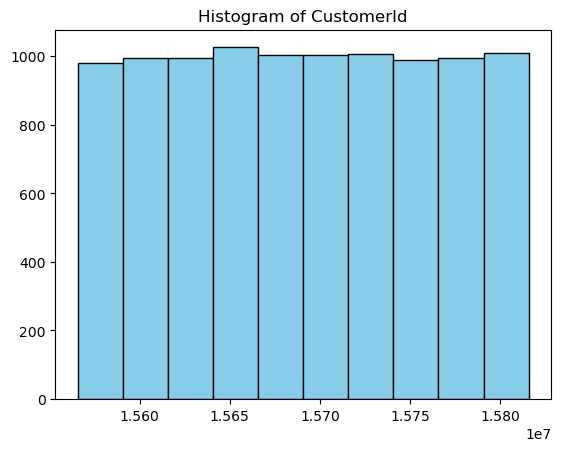

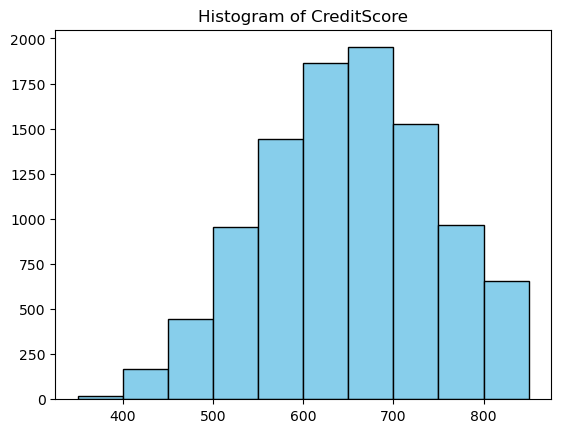

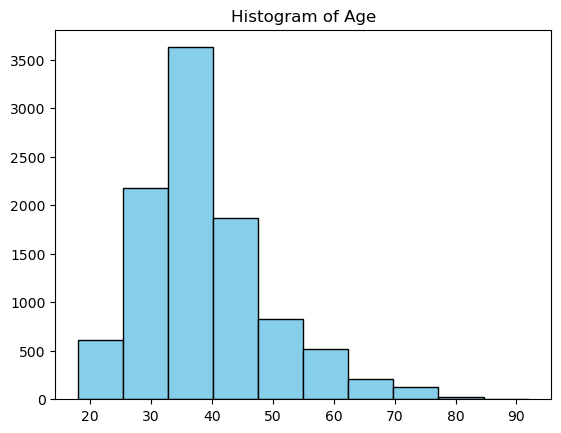

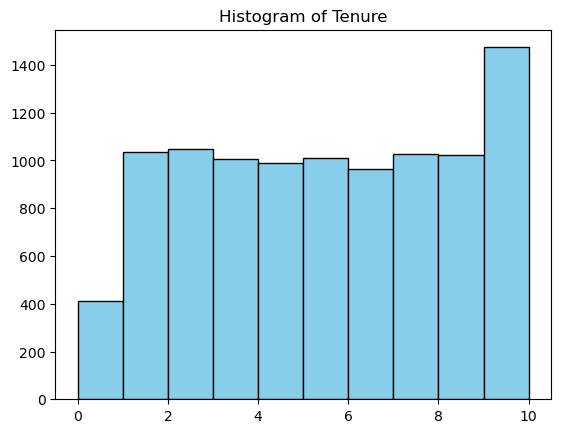

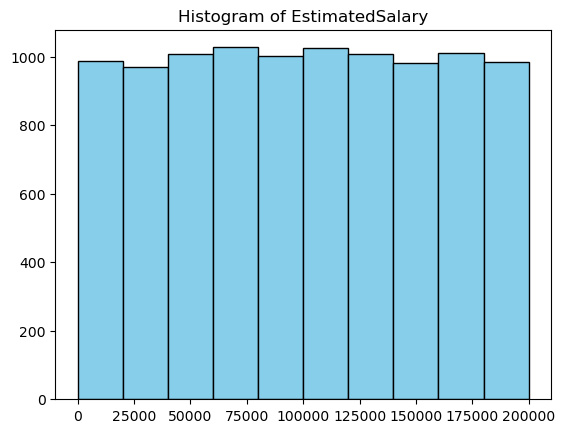

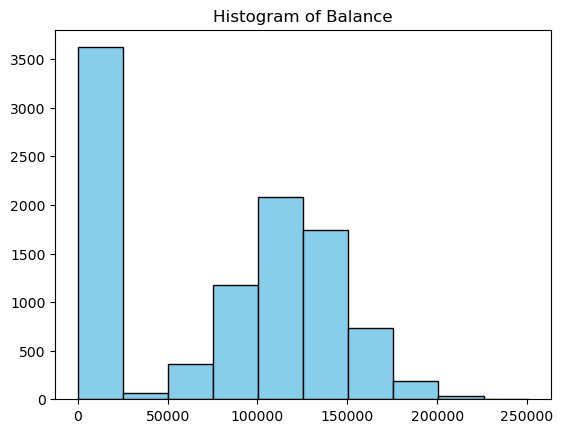

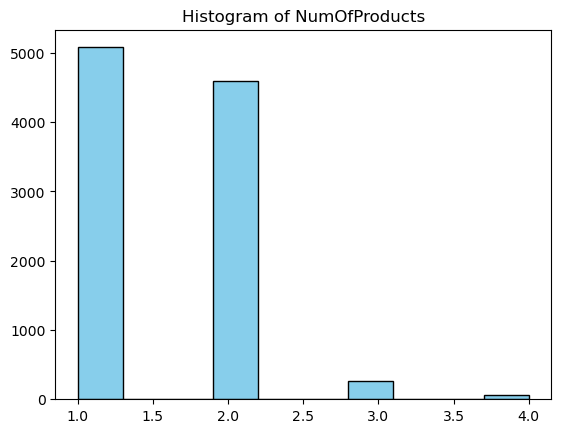

In [59]:
#Density/histogram plot of each numerical column
for column in num_columns:
    plt.hist(comb_df[column], color='skyblue' , edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.show()

# 1 Demographic Analysis#### 
Distribution of Customers Based On Geography,Gender and Age

In [61]:
#Geography Distribution
geography_distribution= comb_df.groupby('Geography')[['CustomerId']].count()
geography_distribution

,CustomerId
Geography,
France,5013
Germany,2508
Spain,2476


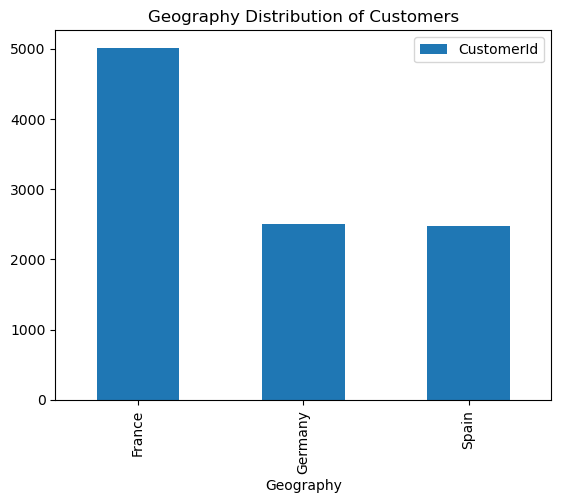

In [62]:
get_bar_chart(geography_distribution, title='Geography Distribution of Customers',xlabel='Geography' ,ylabel='CustomerId')


 RESULT:France has the highest customer distribution,Germany and Spain has similar values with Germany a little higher.

In [64]:
#Gender Distribution
df_gender_distribution=comb_df.groupby('Gender')[['CustomerId']].count()
df_gender_distribution

,CustomerId
Gender,
Female,4541
Male,5456


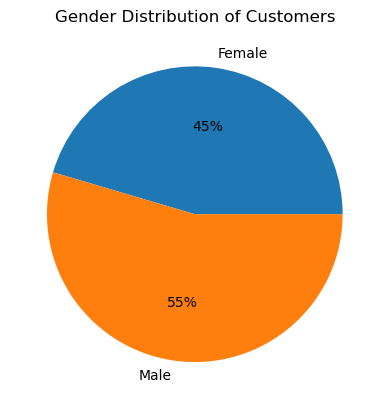

In [65]:
plot_pie(df_gender_distribution['CustomerId'], df_gender_distribution.index, 'Gender Distribution of Customers')

 RESULT:Male customers have a higher percentage of population(55%) than female customers(45%).

In [67]:
#Age Distribution
df_age_distribution=comb_df.groupby('Age')[['CustomerId']].count().sort_values(by='CustomerId', ascending =False)
df_age_distribution

,CustomerId
Age,
37,478
38,477
35,474
36,456
34,447
...,...
92,2
82,1
83,1


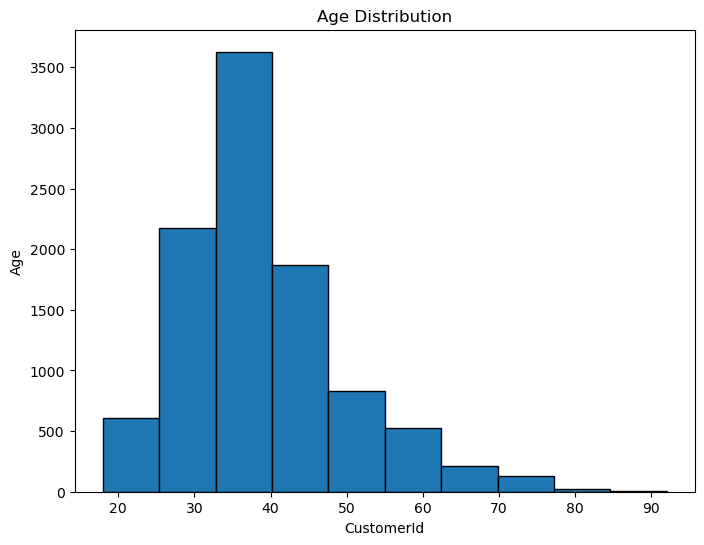

In [68]:
plt.figure(figsize=(8,6))
plt.hist(comb_df['Age'], bins=10, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('CustomerId')
plt.ylabel('Age')
plt.show()

 RESULT:The highest number of customers is between 34-37 years,while age (88-92 ) has the least population

#### Which Geographical location has the highest credit score 

In [71]:
df_creditscore_by_geography_distribution=comb_df.groupby('Geography')[['CreditScore']].mean()
df_creditscore_by_geography_distribution

,CreditScore
Geography,
France,649.690604
Germany,651.484450
Spain,651.324717


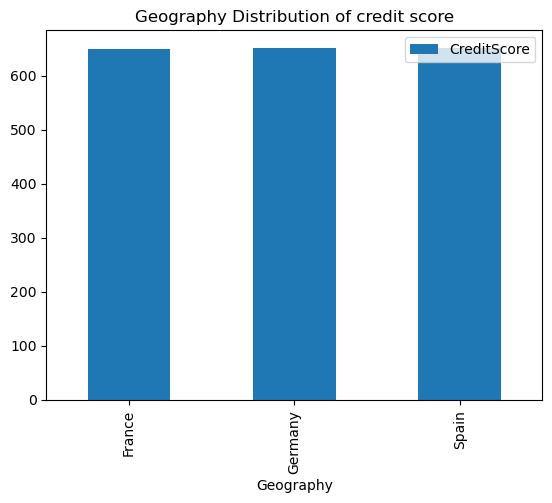

In [72]:
get_bar_chart(df_creditscore_by_geography_distribution, title='Geography Distribution of credit score',xlabel='Geography' ,ylabel='CreditScore')

RESULT: Based on the above analysis,by average Germany and Spain have the highest credit scores,followed closely by France.

# Which Gender has the highest Balance?

In [144]:
customer_distribution_by_balance_and_gender=comb_df.groupby('Gender')[['Balance']].sum()
customer_distribution_by_balance_and_gender

,Balance
Gender,
Female,"343,579,164.57"
Male,"421,018,185.46"


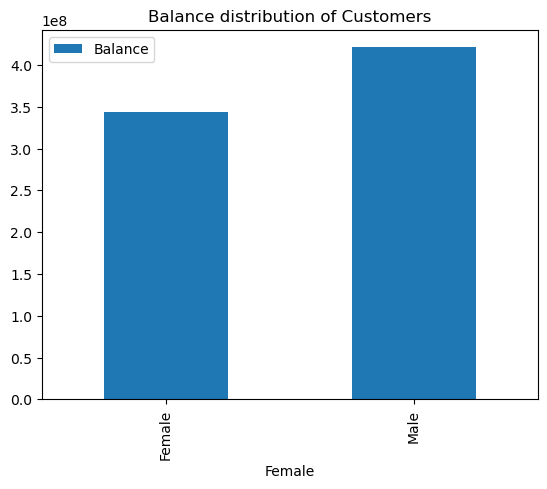

In [76]:
get_bar_chart(customer_distribution_by_balance_and_gender, title='Balance distribution of Customers',xlabel='Female' ,ylabel='Balance') 

 RESULT:The male gender has a higher account balance compared to the females.

# The Estimated Salary by Gender and Geography

In [79]:
estimated_salary=comb_df.groupby(['Gender','Geography'])[['EstimatedSalary']].sum()
estimated_salary

EstimatedSalary
Gender Geography                 
Female France      225,034,644.94
       Germany     122,118,396.55
       Spain       109,699,443.04
Male   France      275,779,717.12
       Germany     131,475,024.69
       Spain       136,514,723.55

Text(0.5, 1.0, 'Customer Estimated Salary by Gender and Geography')

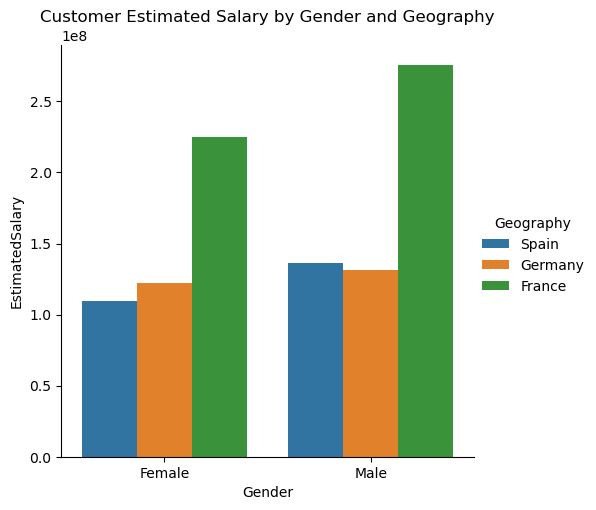

In [80]:
sb.catplot(x='Gender', y='EstimatedSalary', hue='Geography', kind='bar' , data=estimated_salary.sort_values(by='EstimatedSalary'),height=5, aspect=1)
plt.title ('Customer Estimated Salary by Gender and Geography')

 RESULT:Male customers have higher estimated salaries than female customers in all geographical locations

# CUSTOMER ENGAGEMENT PATTERN

In [83]:
#Relationship between customer's tenure and bank's products
count_of_credit_card=comb_df['HasCrCard'].value_counts()
count_of_credit_card

HasCrCard
Yes    5149
No     4848
Name: count, dtype: int64

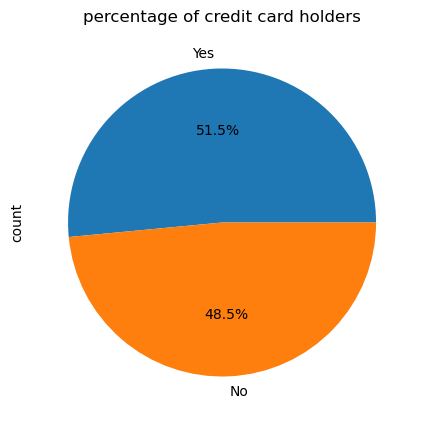

In [84]:
count_of_credit_card.plot(kind='pie',subplots=True,autopct='%1.1f%%',figsize=(10,5))
plt.title('percentage of credit card holders')
plt.show()

RESULT:From our analysis,slightly more than half of the customers own credit cards,however there is a relatively small difference between credit card owners and non owners.

In [86]:
num_of_products_distribution=comb_df.groupby('Tenure')[['NumOfProducts']].count().sort_values(by='NumOfProducts', ascending=False)
num_of_products_distribution

,NumOfProducts
Tenure,
2,1047
1,1035
7,1028
8,1025
5,1012
3,1008
4,989
9,984
6,966


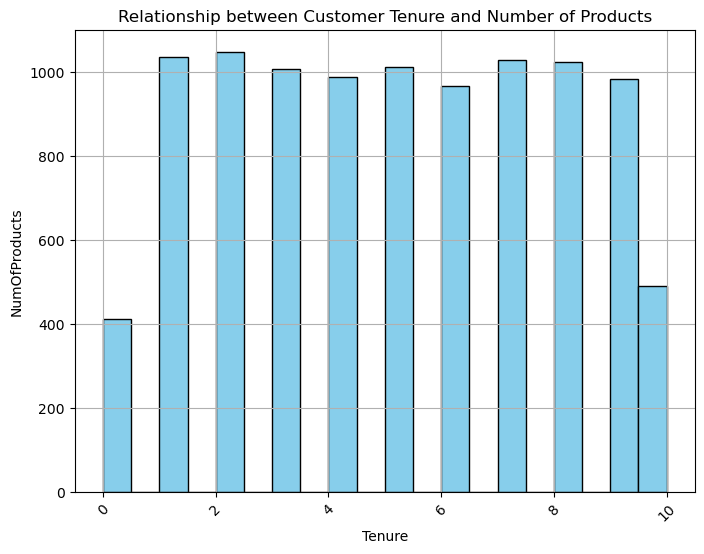

In [87]:
plt.figure(figsize=(8,6))
plt.hist(comb_df['Tenure'], bins=20, color='skyblue',edgecolor='black')
plt.xlabel('Tenure')
plt.ylabel('NumOfProducts')
plt.title('Relationship between Customer Tenure and Number of Products')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


###### Result:
###### New customers(0 years) tenure own the lowest number of products(413)
###### Customers with one and 2years tenure own the highest number of products.

In [89]:
credit_card_distribution_by_tenure=comb_df.groupby('Tenure')[['HasCrCard']].count().sort_values(by='HasCrCard',ascending=False)
credit_card_distribution_by_tenure

,HasCrCard
Tenure,
2,1047
1,1035
7,1028
8,1025
5,1012
3,1008
4,989
9,984
6,966


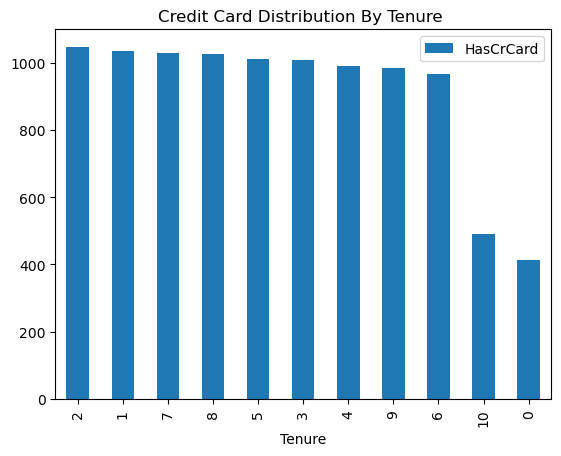

In [90]:
get_bar_chart(credit_card_distribution_by_tenure, title='Credit Card Distribution By Tenure ',ylabel='HasCrCard' ,xlabel='Tenure')

###### RESULT:
1. Highest demand for credit card are from customers (1-2years):This suggests that new customers are more likely to apply for credit cards possibly due to initial financial needs,building credit history and attractive promotional offers
2. There is a decline in credit card ownership among long term customers:This could indicate-customer's loyalty and stability,reducing the need for new cards,changing financial priorities(e.g mortgage or family).
3. potential churn or dissatifaction with existing credit cards.
4. New customers(oyears) tenure have the lowest demand for credit cards:This is expected as new customers may not yet have explored various credit card options,or may have not established credit history,or maybe cautious in applying for credit cards

In [92]:
count_of_active_members=comb_df['IsActiveMember'].value_counts()
count_of_active_members

IsActiveMember
Yes    5149
No     4848
Name: count, dtype: int64

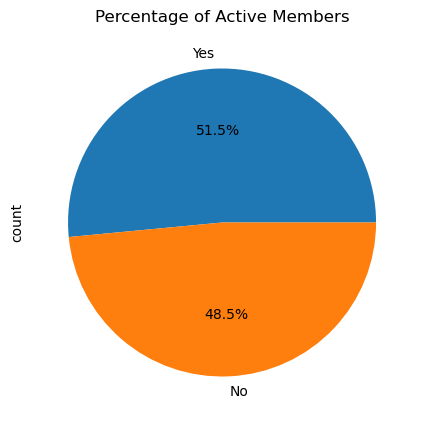

In [93]:
count_of_active_members.plot(kind='pie',subplots=True,autopct='%1.1f%%',figsize=(10,5))
plt.title('Percentage of Active Members')
plt.show()

RESULT:The number of active members(5149) is slightly higher than non active members(4848).The difference is approximately 301

In [95]:
active_member_distribution_by_tenure=comb_df.groupby('Tenure')[['IsActiveMember']].count().sort_values(by='IsActiveMember',ascending=False)
active_member_distribution_by_tenure                                                                                                

,IsActiveMember
Tenure,
2,1047
1,1035
7,1028
8,1025
5,1012
3,1008
4,989
9,984
6,966


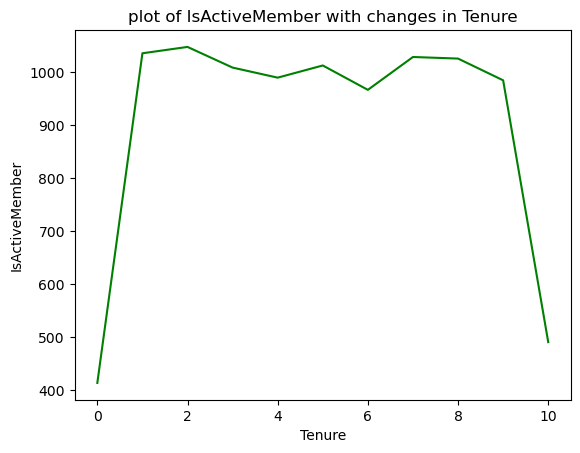

In [96]:
generate_line_chart('Tenure','IsActiveMember', xlabel='Tenure',ylabel='IsActiveMember',data=active_member_distribution_by_tenure,color='green',estimator='count')


RESULT:
1. Active members are primarily concentrated in 1-2 years tenure range(1047 and 1035) respectively.
2. Members with 7years of tenure (1028),are almost as numerous as those with 1-2 years tenure.
3. Members with 10years are significantly fewer(490).
4. New members account for the smallest proportion(413).

In [98]:
balance_distribution=comb_df.groupby('Tenure')[['Balance']].sum().sort_values(by='Balance', ascending=False)
balance_distribution

,Balance
Tenure,
1,"81,304,822.67"
2,"80,527,928.54"
8,"79,885,013.21"
3,"78,225,722.99"
7,"77,667,080.19"
5,"77,361,612.23"
9,"75,337,543.31"
4,"73,244,740.73"
6,"71,828,419.11"


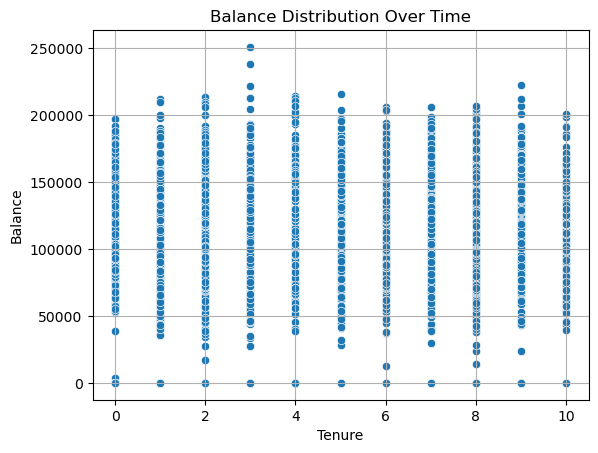

In [99]:
sb.scatterplot(x='Tenure', y='Balance', data=comb_df)
plt.title('Balance Distribution Over Time')
plt.xlabel('Tenure')
plt.ylabel('Balance')
plt.grid('True')
plt.show()

##### RESULT:
#####  1.Customers with 1-2 years tenure have the highest account balance.
##### 2. Customers between(3-9) years tenure have relatively high balances.
##### 3.Customers with 0 and 10 years have the lowest account balance.   
    Longer tenure customers tend to acquire more wealth and hold more products,however the relationship is not entirely linear because customers with 10 years tenure have surprisingly low balances.

# FINANCIAL PERFORMANCE

In [102]:
credit_score_by_age_grade=comb_df.groupby('Age')[['CreditScore']].sum().sort_values(by='CreditScore',ascending=False)
credit_score_by_age_grade

,CreditScore
Age,
38,313702
37,311550
35,304474
36,298749
34,290837
...,...
84,945
85,787
82,700


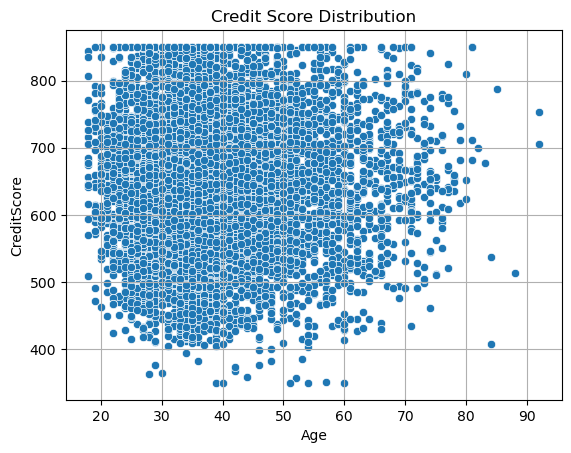

In [103]:
sb.scatterplot(x='Age', y='CreditScore', data=comb_df)
plt.title('Credit Score Distribution')
plt.xlabel('Age')
plt.ylabel('CreditScore')
plt.grid('True')
plt.show()

##### RESULT:
##### Middle aged individuals(34-38) have higher credit scores,while older adults (82-88) have lower credit scores.
##### Credit score peak around mid-life(34-38) and decline with age.

In [105]:
creditscore_distribution_by_geography=comb_df.groupby('Geography')[['CreditScore']].sum().sort_values(by='CreditScore',ascending=False)
creditscore_distribution_by_geography

,CreditScore
Geography,
France,3256899
Germany,1633923
Spain,1612680


array([<Axes: ylabel='CreditScore'>], dtype=object)

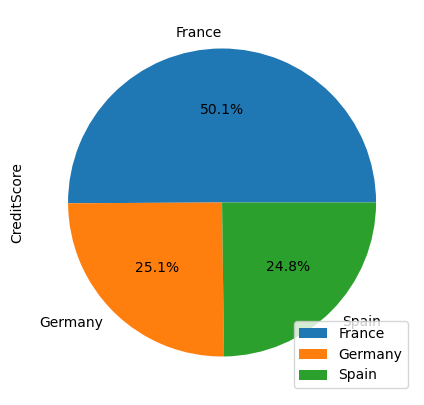

In [106]:
creditscore_distribution_by_geography.plot(kind='pie',subplots=True,autopct='%1.1f%%',figsize=(10,5))

RESULT:France has the highest creditscore among the three locations,Germany and Spain share similar values,with Germany slightly higher.

In [108]:
creditscore_distribution_by_gender=comb_df.groupby('Gender')[['CreditScore']].sum().sort_values(by='CreditScore',ascending=False)
creditscore_distribution_by_gender

,CreditScore
Gender,
Male,3547887
Female,2955615


array([<Axes: ylabel='CreditScore'>], dtype=object)

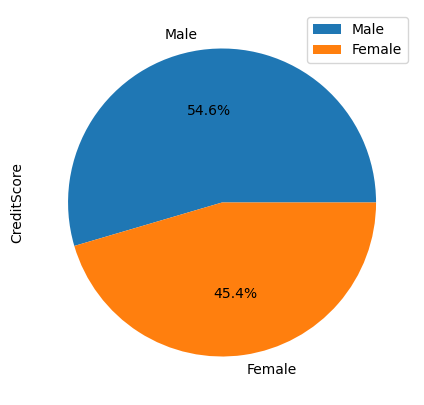

In [109]:
creditscore_distribution_by_gender.plot(kind='pie',subplots=True,autopct='%1.1f%%',figsize=(10,5))

RESULT:Male customers have higher percentage of creditscores(54.6%),compared to the female customers(45.4%) .

In [111]:
estimated_salary_by_age=comb_df.groupby('Age')[['EstimatedSalary']].sum().sort_values(by='EstimatedSalary',ascending=False)
estimated_salary_by_age

,EstimatedSalary
Age,
37,"47,111,581.96"
40,"47,103,438.57"
38,"46,233,241.66"
35,"45,997,974.90"
34,"45,053,137.92"
...,...
81,"227,455.83"
82,"182,055.36"
85,"116,537.96"


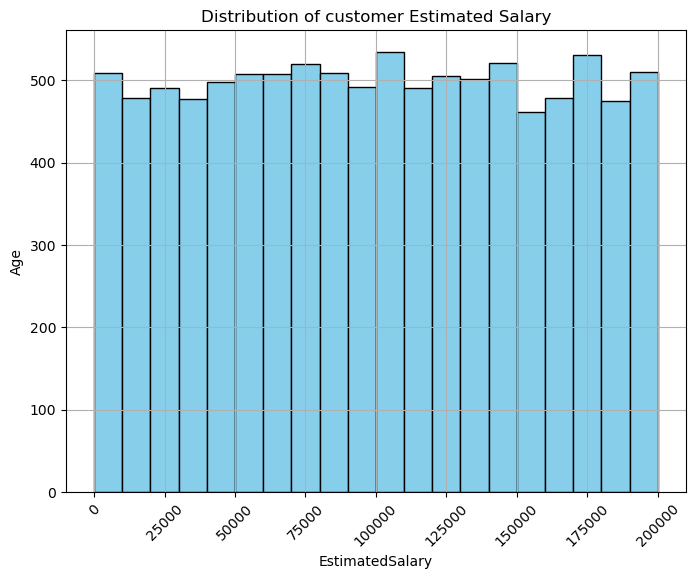

In [112]:
plt.figure(figsize=(8,6))
plt.hist(comb_df['EstimatedSalary'], bins=20, color='skyblue',edgecolor='black')
plt.xlabel('EstimatedSalary')
plt.ylabel('Age')        
plt.title('Distribution of customer Estimated Salary') 
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

##### RESULT:
##### Middle aged individuals(34-40) have high estimated salaries,while older adults (81-88) have lower estimated salaries.
##### Middle adults in their productive years tend to have higher earning potential,unlike older adults who are likely retired or semi retired.

In [114]:
balance_by_geography=comb_df.groupby('Geography')[['Balance']].sum().sort_values(by='Balance',ascending=False)
balance_by_geography

,Balance
Geography,
France,"311,332,479.49"
Germany,"300,261,511.95"
Spain,"153,003,358.59"


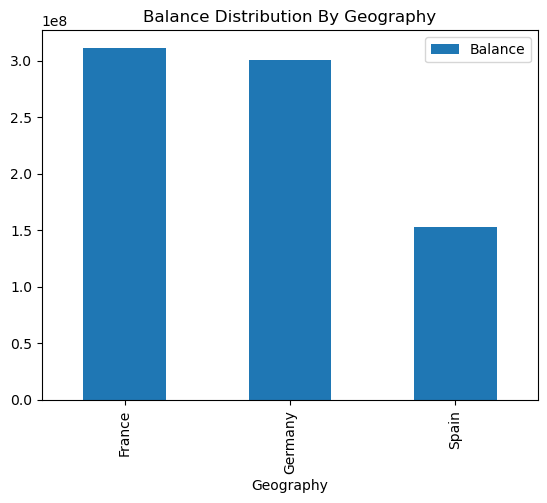

In [115]:
get_bar_chart(balance_by_geography,title='Balance Distribution By Geography',ylabel='Balance' ,xlabel='Geography')

RESULT:France has the highest balance in total,followed closely by Germany.Spain has the lowest balance in total.

In [122]:
balance_distribution_by_age=comb_df.groupby('Age')[['Balance']].sum().sort_values(by='Balance',ascending=False)
balance_distribution_by_age                                                         

,Balance
Age,
37,"38,266,130.63"
35,"36,692,532.78"
38,"35,905,029.90"
33,"33,790,452.49"
40,"33,275,087.69"
...,...
81,"122,029.15"
80,0.00
82,0.00


In [ ]:
sb.scatterplot(x='Age', y='Balance', data=comb_df)
plt.title('Balance Distribution By Age')
plt.xlabel('Age')
plt.ylabel('Balance')
plt.grid('True')
plt.show()

RESULT:The customer with the highest balance is 37 years old

In [ ]:
active_member_distribution=comb_df.groupby(['Gender','IsActiveMember']).size().unstack('IsActiveMember')
active_member_distribution                                                                                       

In [ ]:
active_member_distribution.plot(kind='pie',subplots=True,autopct='%1.1f%%',figsize=(10,5))
plt.title('Active Customer Profile')
plt.show()

#### RESULT:
#### 1.Male customers dominate both active(55.7%) and inactive(53.4%) segments.
#### 2.Female customers makeup a significant proportion of both active and inactive segment.

# CHURN RATE ANALYSIS

In [ ]:
exited_customers=comb_df['Exited'].value_counts()
exited_customers

In [ ]:
plt.pie(exited_customers, labels=exited_customers.index, autopct='%.0f%%')
plt.title('Percentage distribution of exited customers and Active Customers')

###### RESULT:
1. A significant minority of customers(20%) have exited the bank indicating room for improvement in customer retention.
2. While 80% of customers remains active suggesting a strong customer base.

In [118]:
churnrate_by_gender=comb_df.groupby(['Gender','Exited'])[['Exited']].count()
churnrate_by_gender

Exited
Gender Exited        
Female No        3402
       Yes       1139
Male   No        4558
       Yes        898

array([<Axes: ylabel='Exited'>], dtype=object)

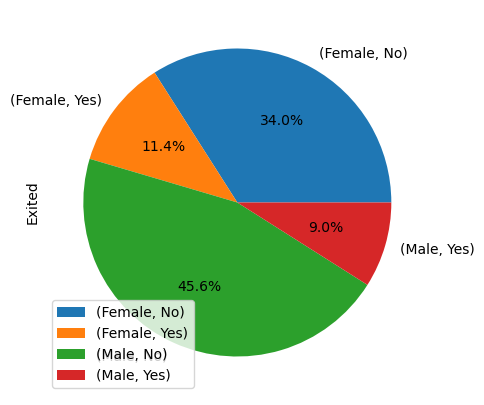

In [120]:
churnrate_by_gender.plot(kind='pie',subplots=True,autopct='%1.1f%%',figsize=(10,5))

RESULT:Female customers(1139) have exited the bank more than male customers(898).

In [124]:
exited_customers_by_geography=comb_df.groupby(['Geography','Exited'])[['Exited']].count()
exited_customers_by_geography

Exited
Geography Exited        
France    No        4203
          Yes        810
Germany   No        1694
          Yes        814
Spain     No        2063
          Yes        413

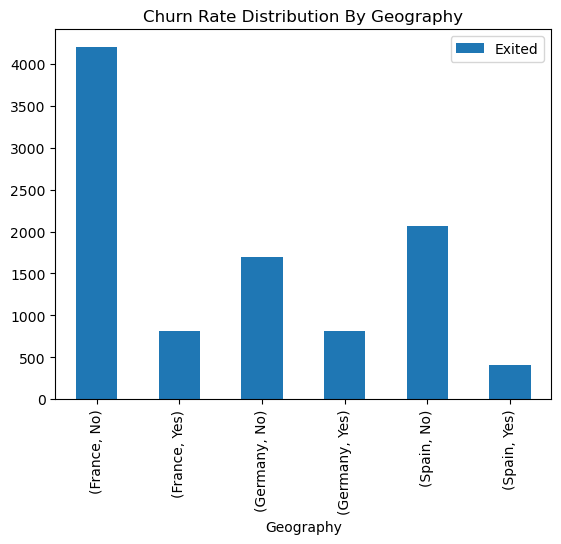

In [126]:
get_bar_chart(exited_customers_by_geography,title='Churn Rate Distribution By Geography',ylabel='Exited' ,xlabel='Geography')

RESULT:Germany has the highest number of churned customers(814),followed closely by France(810).Spain has the lowest number of churned customers(413).

In [132]:
churnrate_by_creditscore=comb_df.groupby('CreditScore')[['Exited']].count().sort_values(by='Exited',ascending=False)
churnrate_by_creditscore

,Exited
CreditScore,
850,233
678,63
655,54
705,53
667,53
...,...
441,1
440,1
423,1


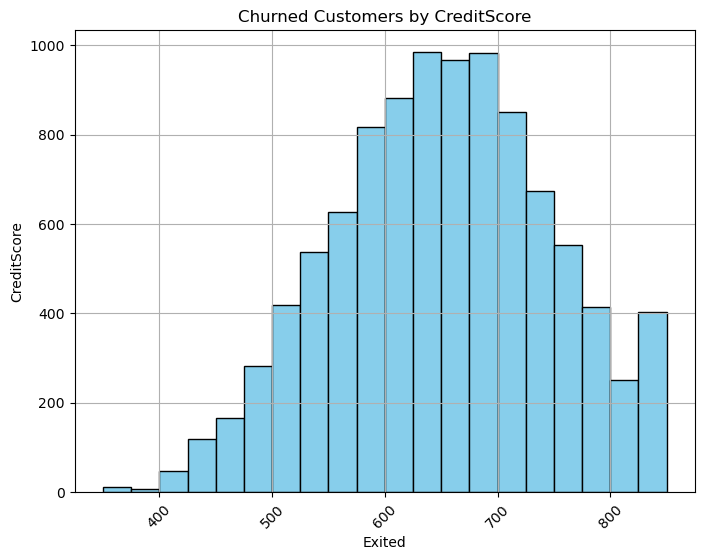

In [134]:
plt.figure(figsize=(8,6))
plt.hist(comb_df['CreditScore'], bins=20, color='skyblue',edgecolor='black')
plt.xlabel('Exited')
plt.ylabel('CreditScore')        
plt.title('Churned Customers by CreditScore') 
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

RESULT:There is a notable trend of high creditscore customers exiting the bank.This needs to be investigated

In [ ]:
churnrate_by_credit_card_owned=comb_df.groupby('HasCrCard')[['Exited']].count().sort_values(by='Exited',ascending=False)
churnrate_by_credit_card_owned

In [ ]:
churnrate_by_credit_card_owned.plot(kind='pie',subplots=True,autopct='%1.1f%%',figsize=(10,5))
plt.title('Churn Rate By CreditCard owned')
plt.show()

##### RESULT:
##### 1.Slightly more exited customers have credit cards.
##### 2.Approximately 50% of exited customers have credit card.

In [128]:
 churnrate_by_balance_distribution=comb_df.groupby('Balance')[['Exited']].count().sort_values(by='Exited',ascending=False)
churnrate_by_balance_distribution

,Exited
Balance,
0.00,3616
"130,170.82",2
"105,473.74",2
"128,793.63",1
"132,217.45",1
...,...
"107,106.33",1
"107,104.50",1
"107,073.27",1


In [ ]:
plt.figure(figsize=(8,6))
plt.hist(comb_df['Balance'], bins=20, color='skyblue',edgecolor='black')
plt.xlabel('Balance')
plt.ylabel('Exited')        
plt.title('Churn Rate By Balance Distribution') 
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


RESULT:A substantial number of customers(3616) with 0 account balance have exited the bank,while few customers with high account balances have exited the bank.

In [130]:
churnrate_by_age_grade=comb_df.groupby('Age')[['Exited']].count().sort_values(by='Exited',ascending=False)
churnrate_by_age_grade

,Exited
Age,
37,478
38,477
35,474
36,456
34,447
...,...
92,2
82,1
83,1


In [ ]:
plt.figure(figsize=(8,6))
plt.hist(comb_df['Age'], bins=20, color='skyblue',edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Exited')        
plt.title('Exited Customers by Age') 
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

RESULT:Middle aged customers(34-38 years)have higher exit rates,while older customers(82-92 years) have significantly lower exit rates.

# CUSTOMER SEGMENTATION ANALYSIS
1. France has the highest customer distribution,creditscore and balance,while Germany and Spain share similar values with Germany slightly higher than Spain.In contrast,France has the lowest credit score by average with Germany and Spain topping the charts.
2. Germany has the highest number of churned customers(814),followed closely by France(810).Spain has the lowest number of churned customers(413)
3. Male customers leads with the highest etsimated salary,balance,population and creditscore than female customers.
4. We have a higher percentage of churned female customers,although the difference is minimal.
5. Our analysis also suggests that we have a higher percentage of active and inactive male customers than female customers.
6. The greater population of our customer base is between ages (34 - 37 years),while ages 88-92 has the least population.
7. Highest demand for credit cards are from customers with (1-2years) tenure,on the other hand new customers(0 year) tenure have the lowest demand for credit cards.There is a decline in card ownership by long term customers(10 years).
8. Slightly more than half(51.5%)  of the entire population of customers own credit cards,but there is a relatively small difference between credit card owners and non card owners(48.5%).
9. Customers with (1-2 years) tenure has the highest account balances, number of products and credit scores.While it's the opposite for (0 and 10 years) customers.
10. Middle aged customers(34-38 years) have higher credit scores and estimated salaries while older adults (82-88) years have lower credit scores and estimated salaries.
11. A significant minority of customers(20%) have exited the bank,indicating room for improvement in customer retention,while 80% of customers remains active suggesting a strong customer base.
12. There is a notable trend of high credit score customers exiting the bank that needs to be investigated.
13. Middle aged customers(34-37) years have higher exit rate, while older customers(82-92) years have significantly lower exit rates.
14. A substantial amount of exited customers(3616) have 0 account balance while approximately 50% of exited customers have credit cards. 

# RECOMMENDATION
1. Germany and France has a high customer exit rate that requires urgent attention to keeep customers and grow revenue.
2. Germany and Spain have high average credit scores and can boost growth by offering premium services to high credit customers e.g higher interest rates and copying France's successful strategies and adapting.
3. Investigate reasons behind female customer's high exist rates and develop initiatives that cater to both male and female financial needs.
4. Low account balances and credit score among (0 and 10 years) customers may explain their low credit card demand.Further investigation is recommended to confirm this analysis
5. Apex bank should offer persoalized banking services and exclusive benefits to customers aged 34-38 with high credit scores,salaries and balances to increase loyalty and retentiom
6. Inactive Accounts: Many exited customers didn't utilize their accounts.Reasons behind inactive accounts should be investigated if lack of usage led to exit.
7. Credit Card Usage:Half of exited customers had credit cards indicating unmet needs or dissatifaction.Credit card usage patterns among exited customers should be analyzed.Determine if credit card issues led to exit.
8. There is a notable trend of high credit score customers exiting the bank and potential reasons could be :- better offers from competitors e.g lower interest rates,unmet expectations for premium services or recognition etc.To retain customers and increase growth, Apex bank should check what competitors offer, to prevent customers from switching to better ideas,offer special benefits to reward loyal customers, build trust and foster relationships with customers and  introduce online banking services if none.
    In conclusion, by addressing these issues Apex Bank can:Prevent churn, build customer loyalty,retain high value customers and maintain a strong customer base.  